| 컬럼명                            | 설명                                                                 |
|----------------------------------|----------------------------------------------------------------------|
| gender                           | 성별 (1: 남성, 0: 여성)                                             |
| Near_Location                    | 헬스장이 집이나 직장 근처에 있는지 여부 (1: 예, 0: 아니오)          |
| Partner                          | 헬스장 이용 파트너(친구/연인 등)가 있는지 여부 (1: 있음, 0: 없음)   |
| Promo_friends                    | 친구 추천 프로모션을 통해 가입했는지 여부 (1: 예, 0: 아니오)        |
| Phone                            | 전화번호 제공 여부 (1: 예, 0: 아니오)                               |
| Contract_period                  | 가입한 헬스장 계약 기간 (단위: 개월)                                |
| Group_visits                     | 그룹 운동 참여 여부 (1: 참여, 0: 불참)                              |
| Age                              | 고객 나이                                                           |
| Avg_additional_charges_total     | 부가 서비스(PT, 상품 구매 등)에 대한 평균 사용 금액                 |
| Month_to_end_contract            | 계약 종료까지 남은 개월 수                                          |
| Lifetime                         | 헬스장 가입 후 이용 기간 (단위: 개월)                               |
| Avg_class_frequency_total        | 전체 이용 기간 동안 평균 클래스 참여 횟수                          |
| Avg_class_frequency_current_month| 최근 한 달 동안의 클래스 평균 참여 횟수                             |
| Churn                            | 이탈 여부 (1: 탈퇴, 0: 유지)                                       |


In [5]:
import pandas as pd

In [6]:
# 1. 데이터 수집 및 로드
df = pd.read_csv('../original_data/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [7]:
# 2. 데이터 구조 및 변수 이해
print(df.shape) # (4000, 14)
print(df.dtypes) # (수치형 변수만 존재)
print(df.info()) # 결측치 없음

(4000, 14)
gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 n

In [8]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
df.describe(include='object') # 범주형 변수 없음

ValueError: No objects to concatenate

In [13]:
# 결측치, 이상치 탐지
df.isna().sum() # 결측치 없음

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

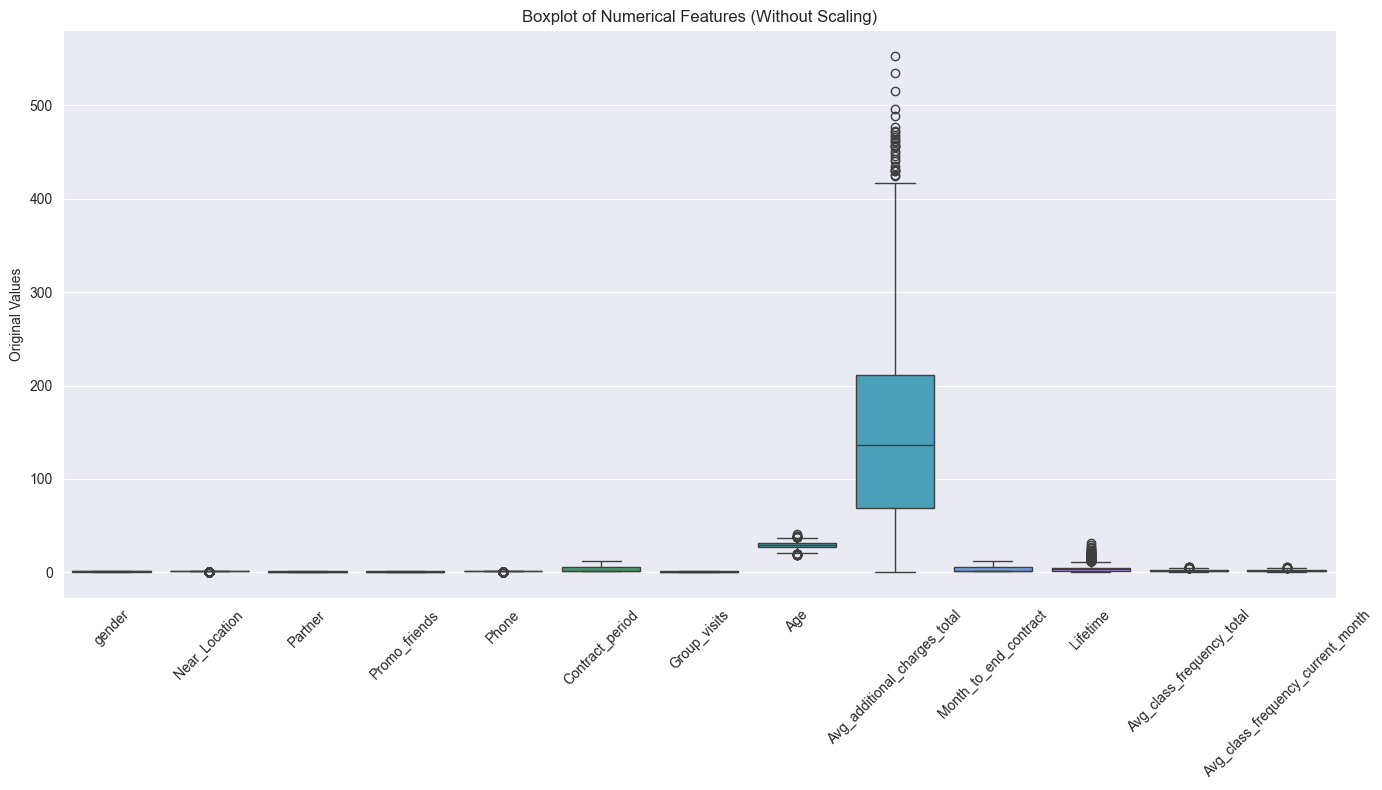

In [19]:
# 이상치 확인

import matplotlib.pyplot as plt
import seaborn as sns

# 'Churn'을 제외한 수치형 변수 선택
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Boxplot 시각화 (스케일링 없이 원본 데이터 기준)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Without Scaling)")
plt.ylabel("Original Values")
plt.tight_layout()
plt.show()


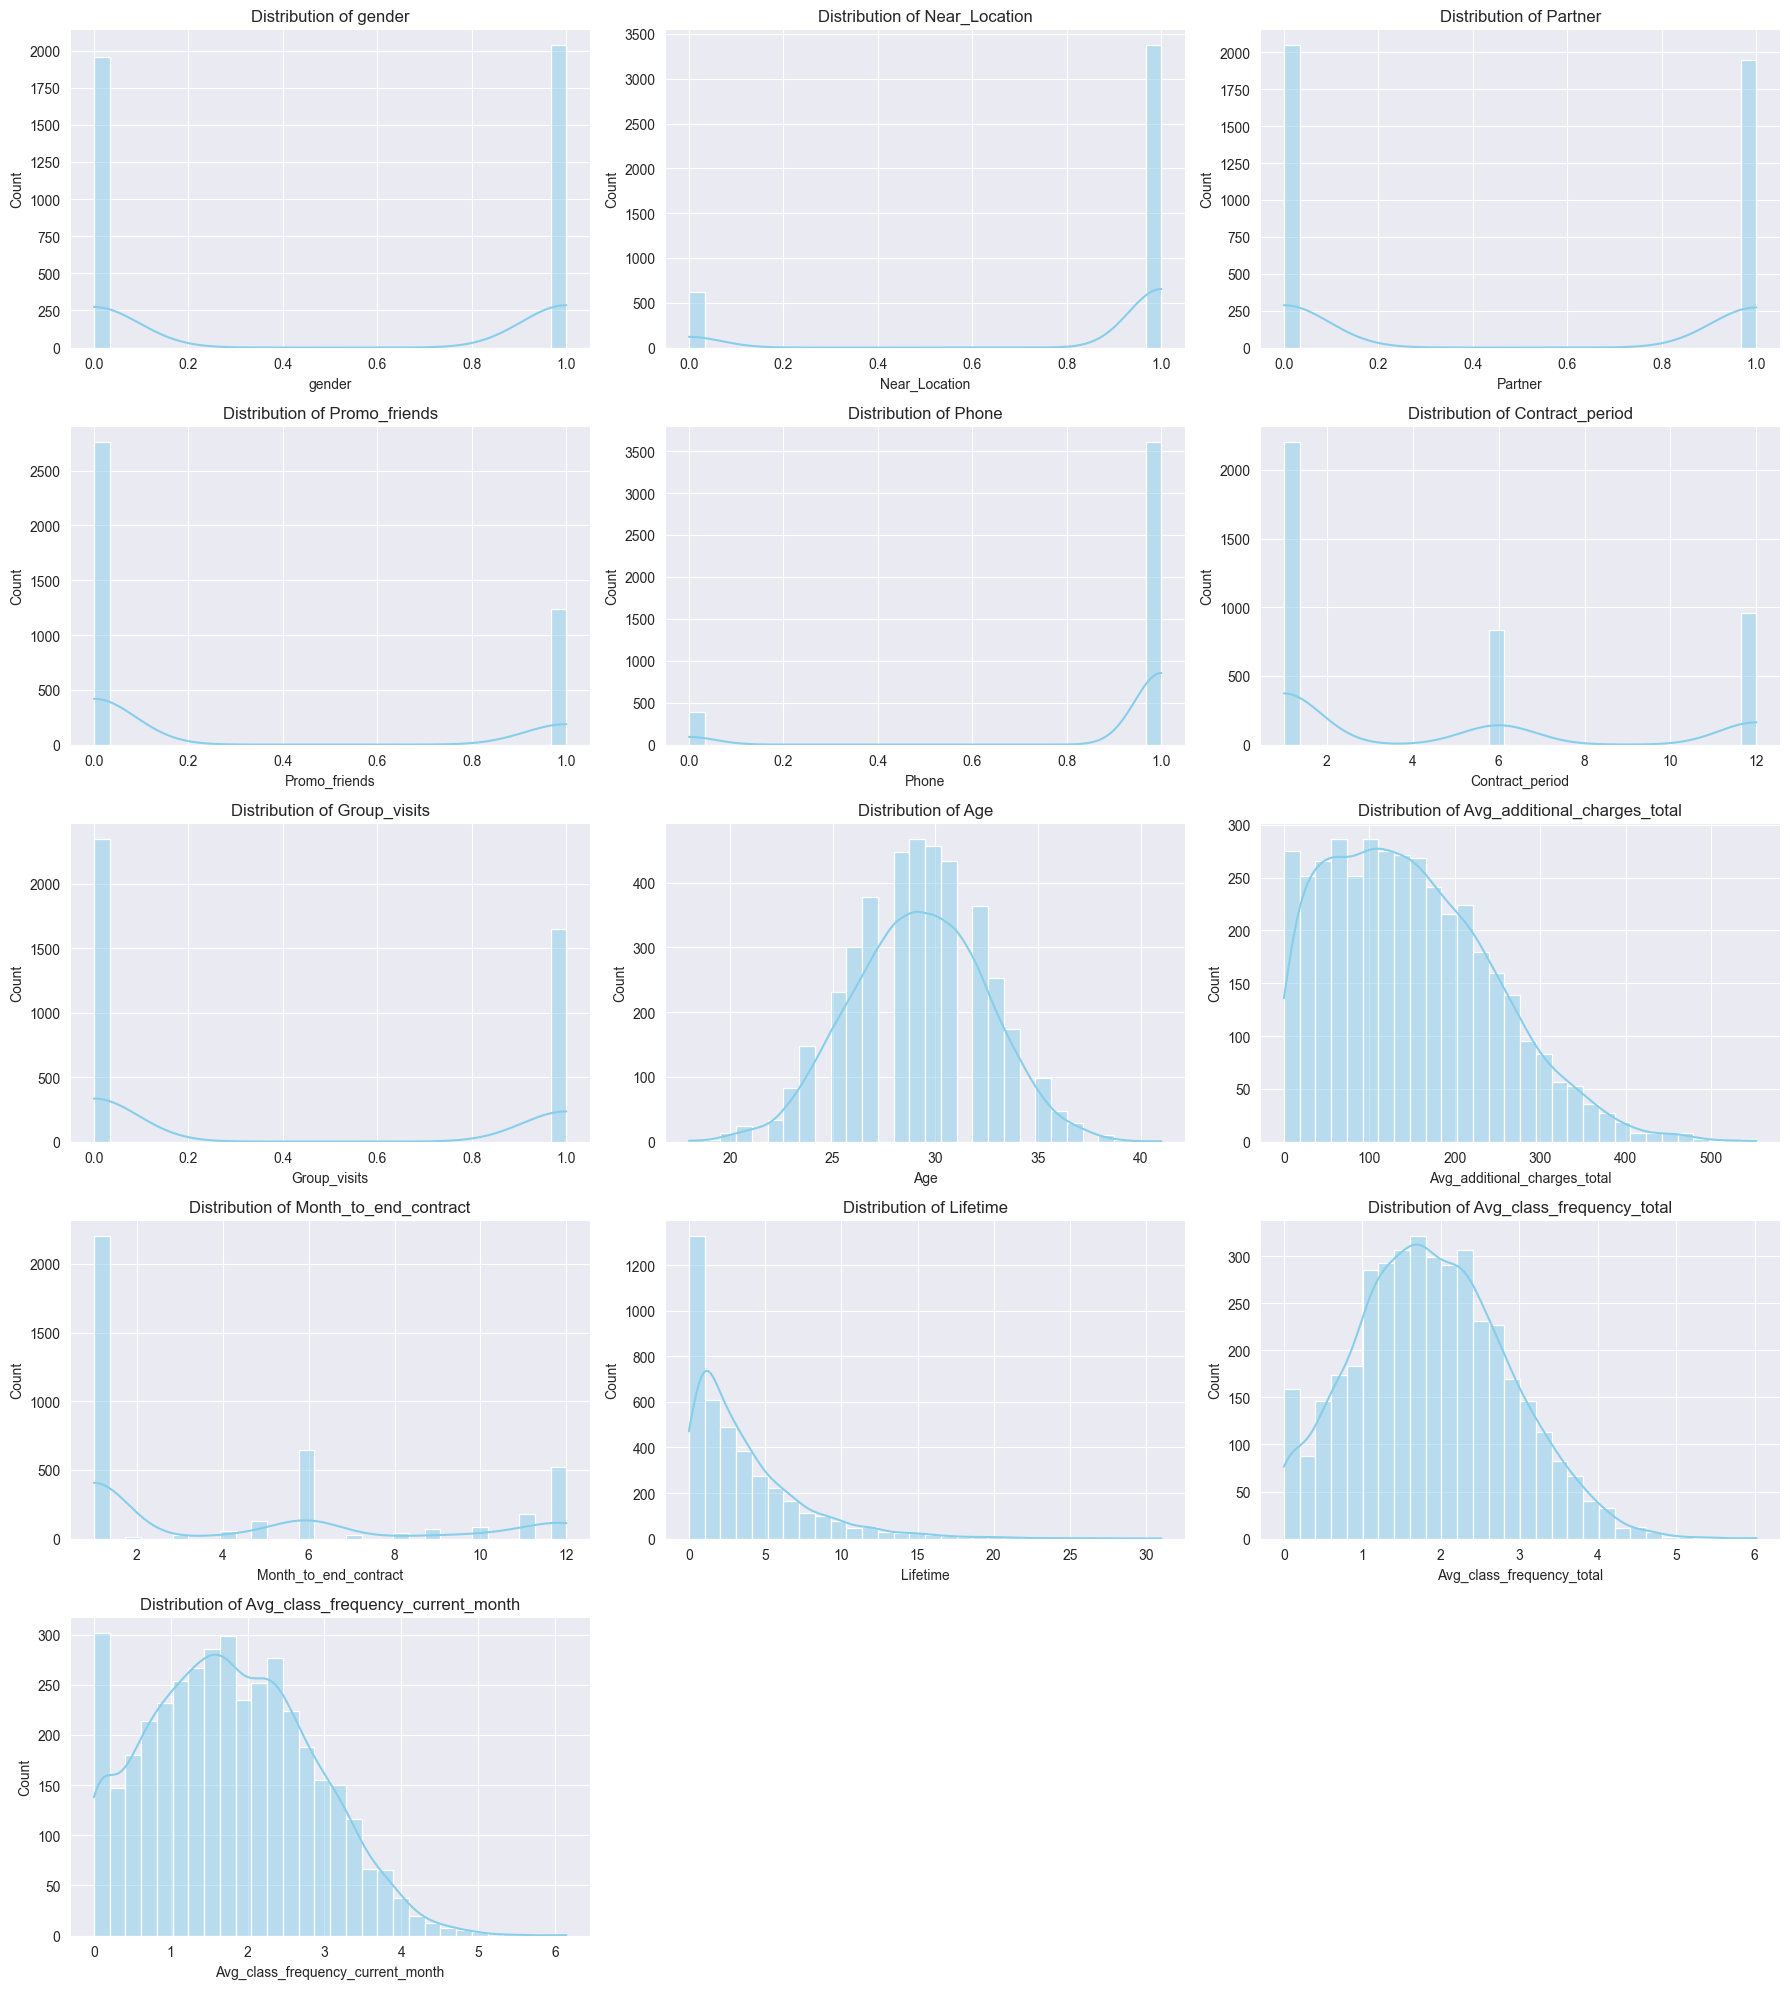

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수와 범주형 변수 나누기
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# 'Churn'은 타겟이므로 제외
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

# 전체 컬럼 수
all_cols = numerical_cols + categorical_cols
n = len(all_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

# 시각화
plt.figure(figsize=(18, nrows * 4))
for i, col in enumerate(all_cols):
    plt.subplot(nrows, ncols, i + 1)
    if col in numerical_cols:
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=col, data=df, palette='pastel')
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


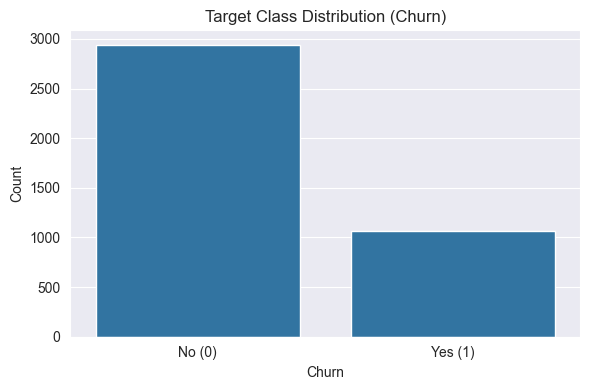

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 📊 클래스 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Target Class Distribution (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


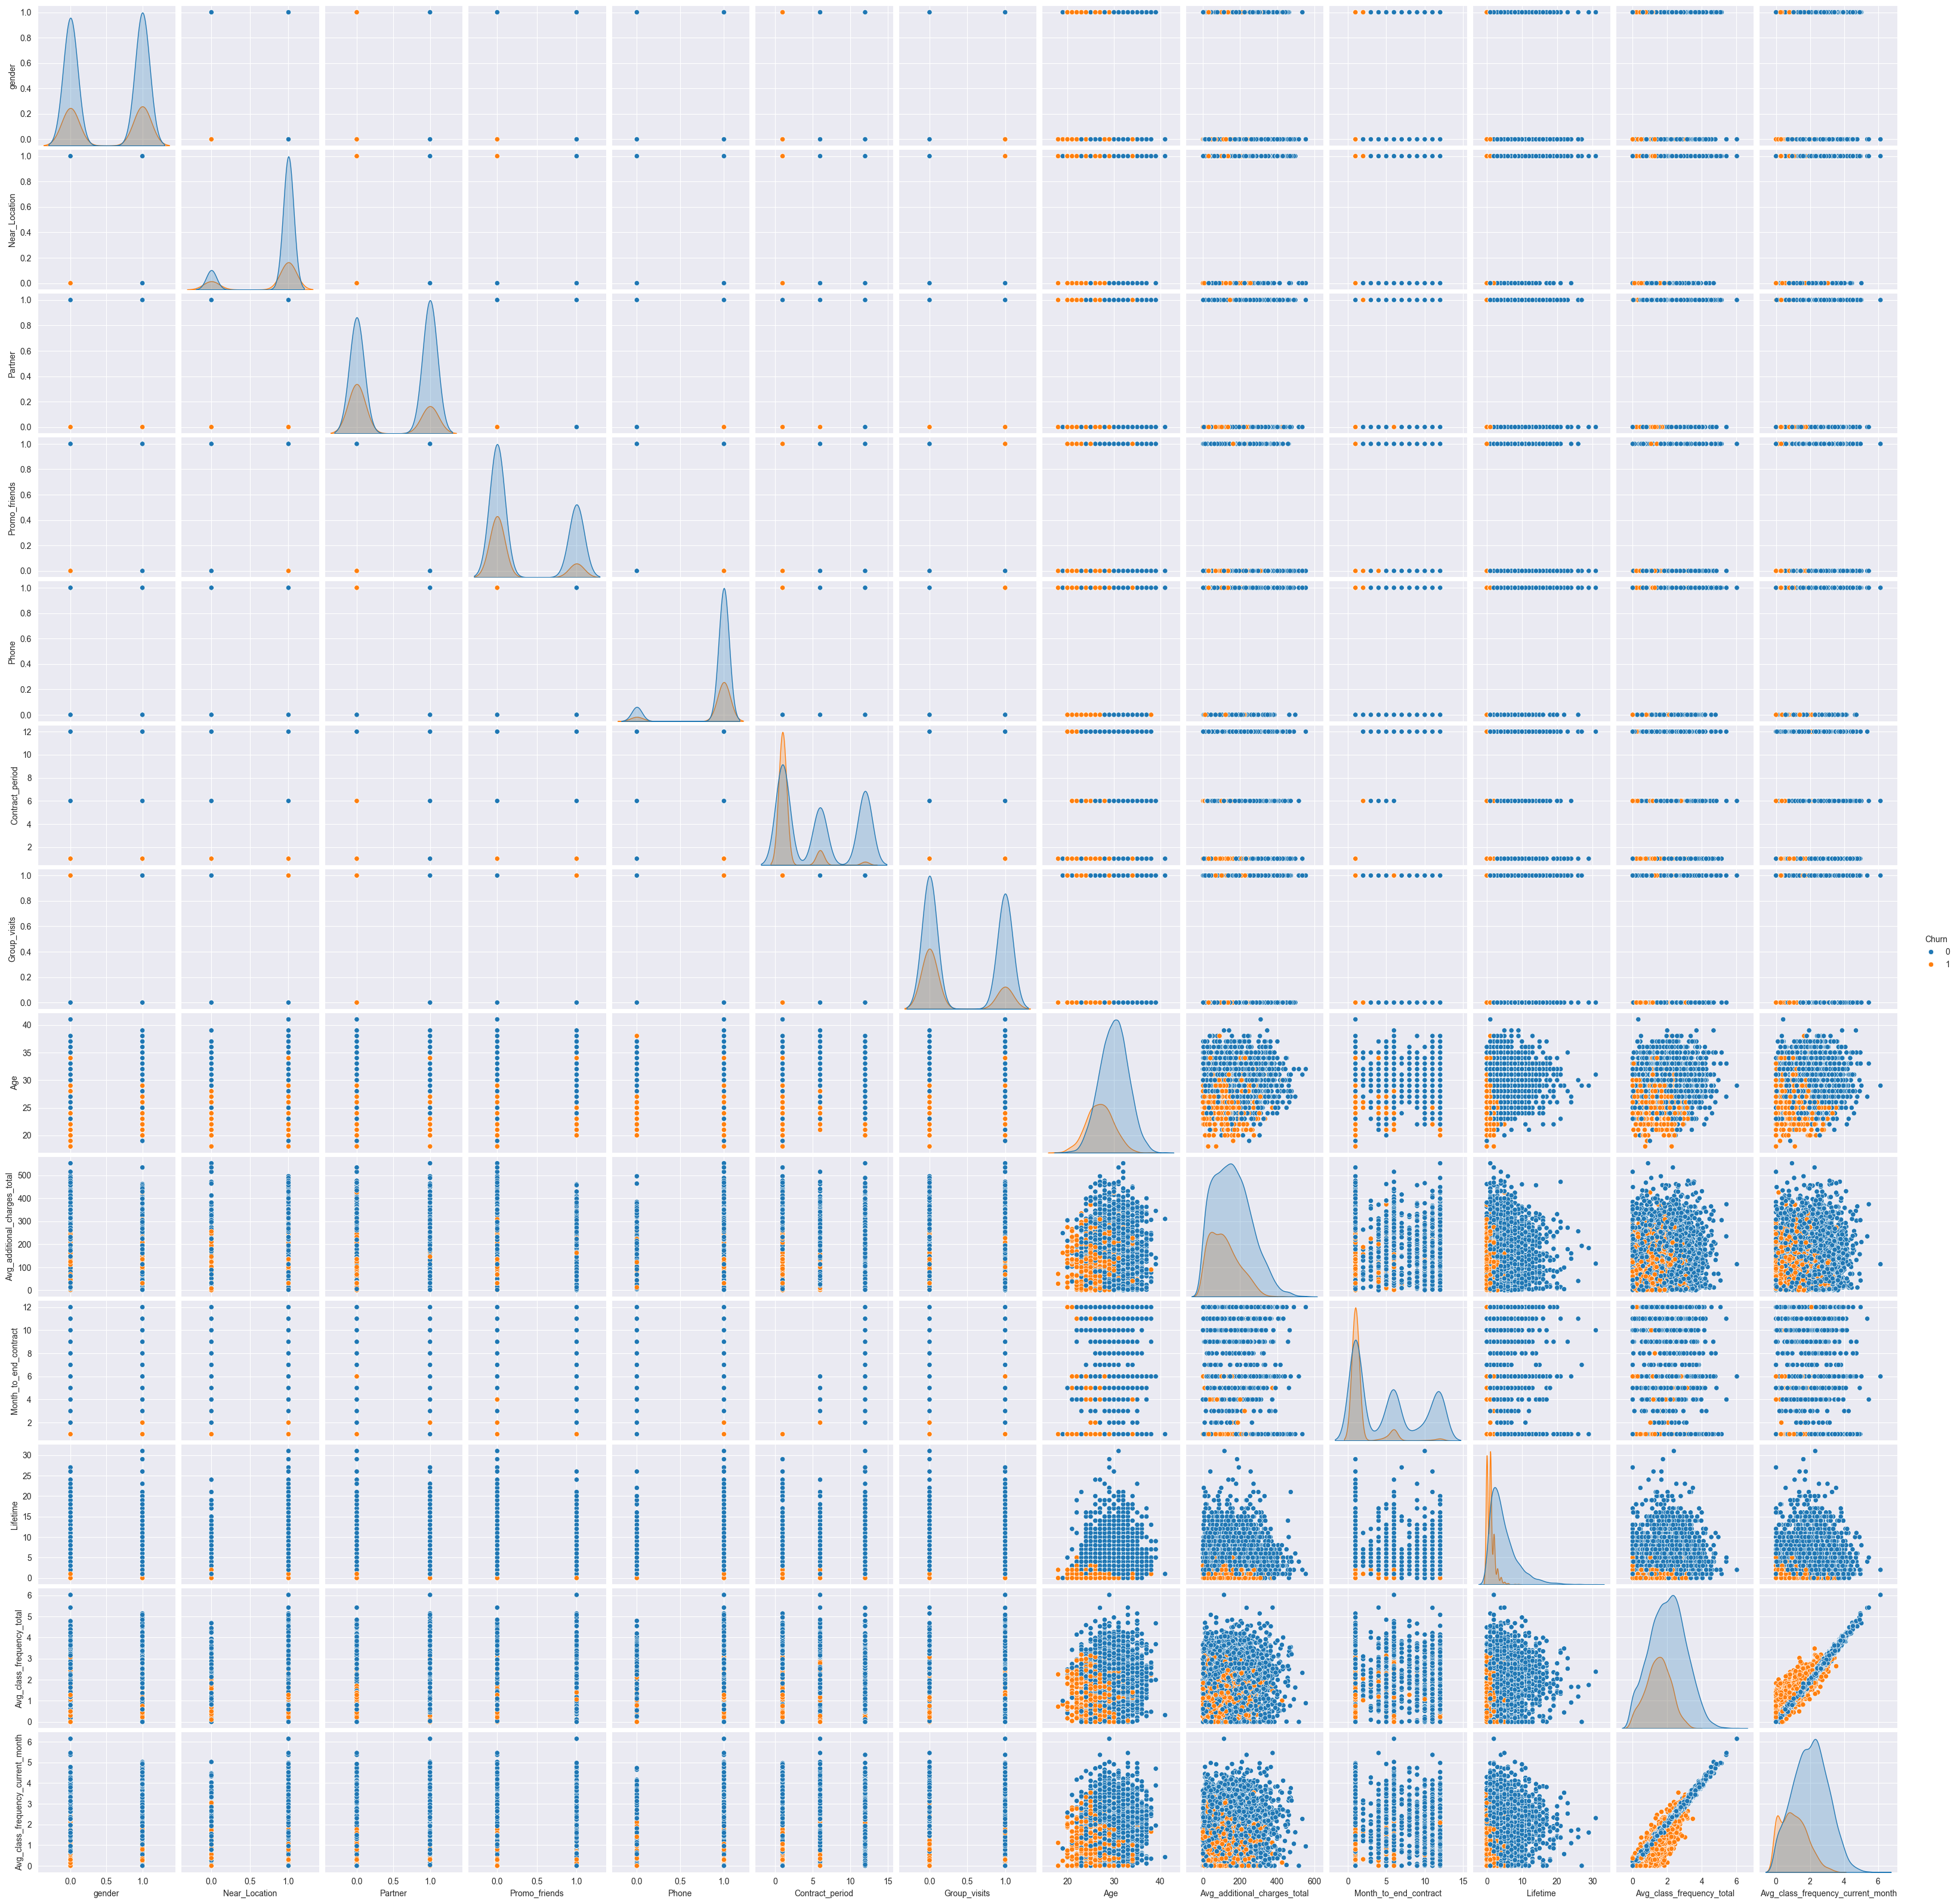

In [22]:
sns.pairplot(df, hue='Churn')
plt.show()

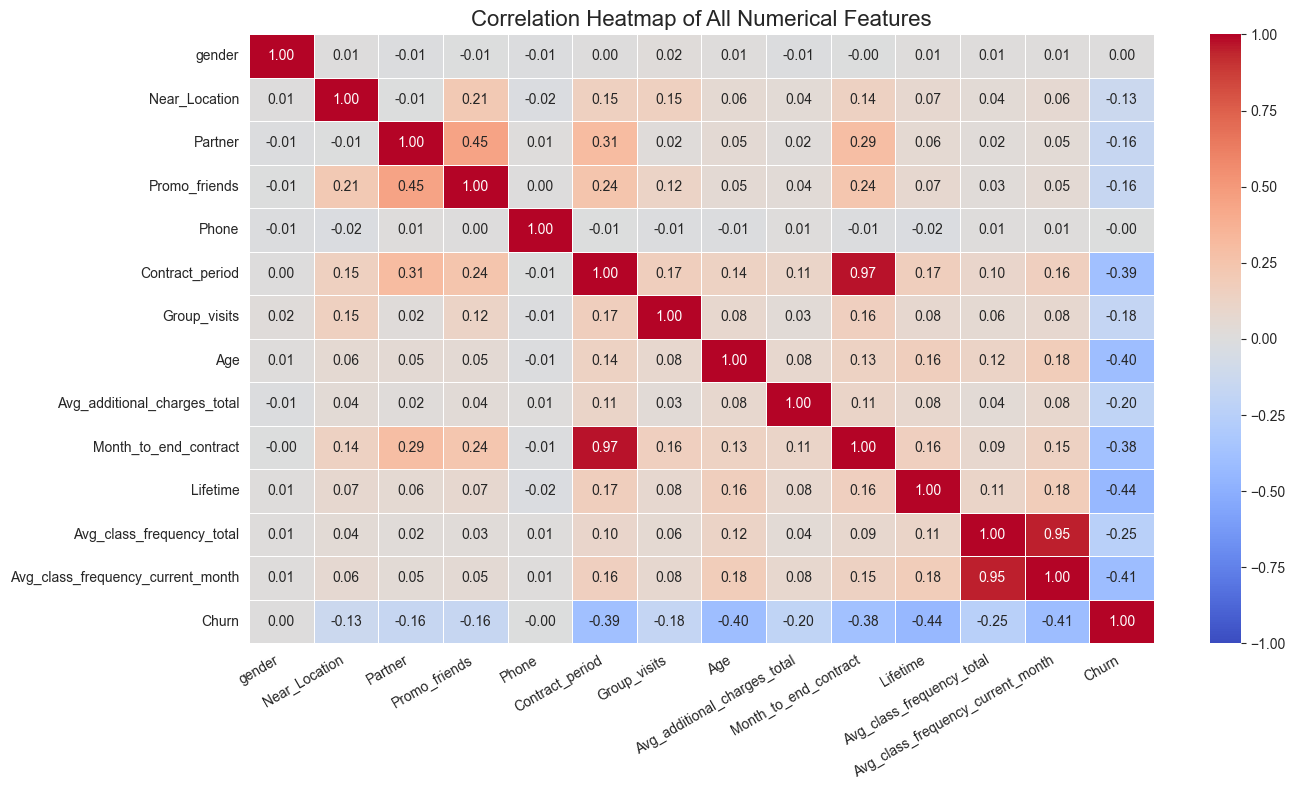

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
corr_matrix = df.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      cmap='coolwarm',
                      fmt=".2f",
                      linewidths=0.5,
                      vmin=-1, vmax=1)

# 제목 추가
plt.title("Correlation Heatmap of All Numerical Features", fontsize=16)

# x축 라벨 회전 및 폰트 크기 설정
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# y축 라벨 폰트 크기 설정
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# 레이아웃 자동조절
plt.tight_layout()
plt.show()


📊 히트맵 상관관계 분석 결과 요약
<br>
🔹 Churn(이탈 여부)와의 상관관계
| 변수명                                       | 상관계수  | 관계 해석                     |
| ----------------------------------------- | ----- | ------------------------- |
| **Lifetime**                              | -0.44 | 총 이용 기간이 길수록 이탈률 낮음       |
| **Avg\_class\_frequency\_current\_month** | -0.41 | 최근 한 달 수업 참여가 많을수록 이탈률 낮음 |
| **Age**                                   | -0.40 | 나이가 많을수록 이탈률 낮음           |
| **Contract\_period**                      | -0.39 | 계약 기간이 길수록 이탈률 낮음         |
| **Month\_to\_end\_contract**              | -0.38 | 계약 종료까지 남은 기간이 길수록 이탈률 낮음 |

